In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("winequality-red.csv",delimiter=';')

data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


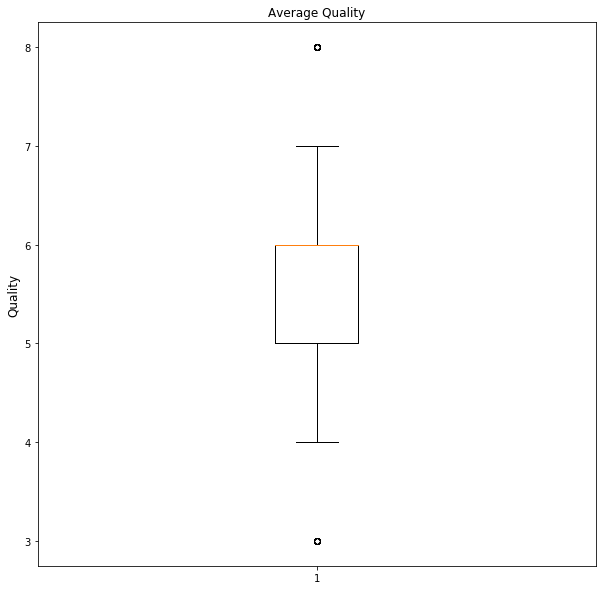

In [33]:
quality_average = data['quality']

plt.figure(figsize=(10,10))
plt.yticks(np.arange(0,10,1))
plt.boxplot(quality_average)
plt.title('Average Quality')
plt.ylabel('Quality', fontsize=12)

plt.show()

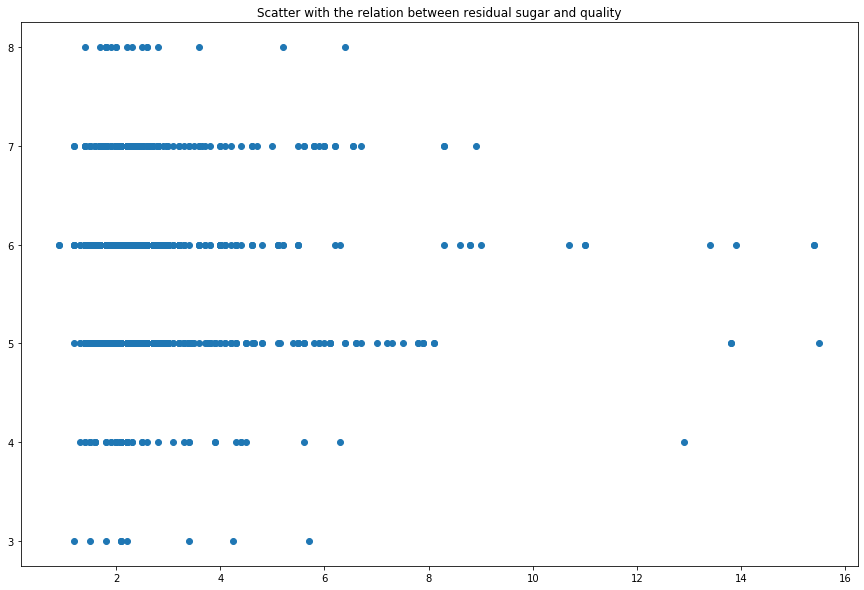

In [34]:
plt.figure(figsize=(15,10))

quality = data['quality']
residual_sugar = data['residual sugar']

plt.scatter(residual_sugar, quality)
plt.title("Scatter with the relation between residual sugar and quality")

plt.show()

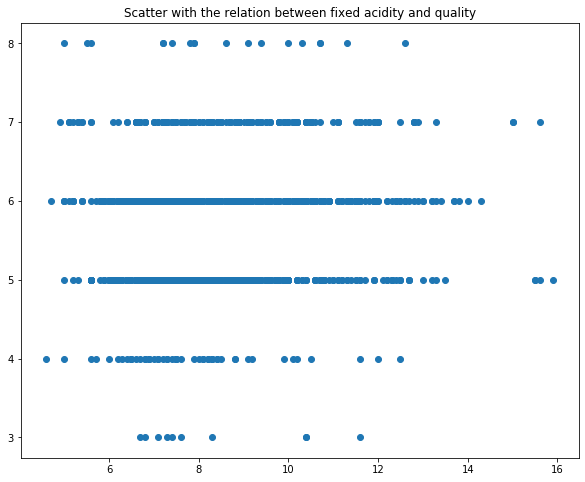

In [35]:
plt.figure(figsize=(10,8))

y = data['quality']
x = data['fixed acidity']

plt.scatter(x, y)
plt.title("Scatter with the relation between fixed acidity and quality")

plt.show()


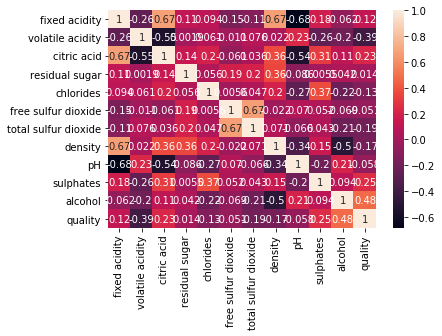

In [36]:
import seaborn as  sns

cor = data.corr()

hm = sns.heatmap(data = cor, annot=True)

In [37]:
y = data['quality']
X = data.drop(['pH','free sulfur dioxide', 'residual sugar', 'quality'],axis=1)

X

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol
0,7.4,0.700,0.00,0.076,34.0,0.99780,0.56,9.4
1,7.8,0.880,0.00,0.098,67.0,0.99680,0.68,9.8
2,7.8,0.760,0.04,0.092,54.0,0.99700,0.65,9.8
3,11.2,0.280,0.56,0.075,60.0,0.99800,0.58,9.8
4,7.4,0.700,0.00,0.076,34.0,0.99780,0.56,9.4
...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,0.090,44.0,0.99490,0.58,10.5
1595,5.9,0.550,0.10,0.062,51.0,0.99512,0.76,11.2
1596,6.3,0.510,0.13,0.076,40.0,0.99574,0.75,11.0
1597,5.9,0.645,0.12,0.075,44.0,0.99547,0.71,10.2


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
# from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNetCV, BayesianRidge
from sklearn.datasets import make_regression
from sklearn.svm import SVR


def mean_calc_rf(model, train_X, val_X, train_y, val_y):
    model.fit(train_X,train_y)
    prediction = model.predict(val_X)
    mae = mean_absolute_error(val_y, prediction)
    r2 = r2_score(val_y, prediction)
    # rmse = root_mean_squared_error(val_y, prediction)
    mse = mean_squared_error(val_y, prediction)
    return mae, r2, mse


train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1, train_size=0.80, test_size=0.20)


models = [ElasticNetCV(cv=5, random_state=1),
          BayesianRidge(),
          SVR(gamma="auto")
          ]

best = -1
model = None

#find best model
for m in models:
    temp_mae, temp_r2, temp_mse = mean_calc_rf(m,train_X,val_X,train_y,val_y)
    if best==-1 or best > temp_mae:
        best = temp_mae
        model = m
    print("MAE: ",temp_mae)
    print("R2: ",temp_r2)
    # print("RMSE: ",temp_rmse)
    print("MSE: ",temp_mse)


MAE:  0.47040005817423397
R2:  0.3461990529718355
MSE:  0.3759241938303087
MAE:  0.46401625208058783
R2:  0.3690290166887533
MSE:  0.3627973610466177
MAE:  0.48313340604724253
R2:  0.27089289010992
MSE:  0.41922393007724934


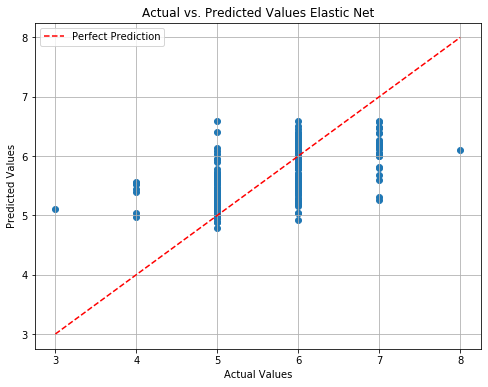

In [39]:
plt.figure(figsize=(8, 6))
models[0].fit(train_X,train_y)
prediction = models[0].predict(val_X)

plt.scatter(val_y, prediction)
plt.plot([min(val_y), max(val_y)], [min(val_y), max(val_y)], linestyle='--', color='red', label='Perfect Prediction')  # Line of perfect agreement
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values Elastic Net")
plt.legend()
plt.grid(True)
plt.show()

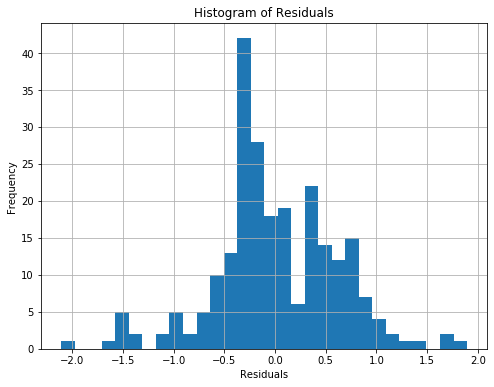

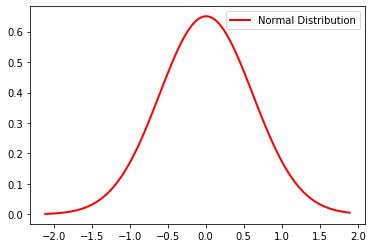

In [40]:
residuals = val_y - prediction
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30)  # Adjust number of bins as needed
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.grid(True)
plt.show()

#optional: add a normal distribution overlay for better assessment of normality
mu, std = np.mean(residuals), np.std(residuals)
x = np.linspace(min(residuals), max(residuals), 100)
plt.plot(x, (1/(std * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mu)/std)**2)),
         'r-', linewidth=2, label = 'Normal Distribution')
plt.legend()
plt.show()

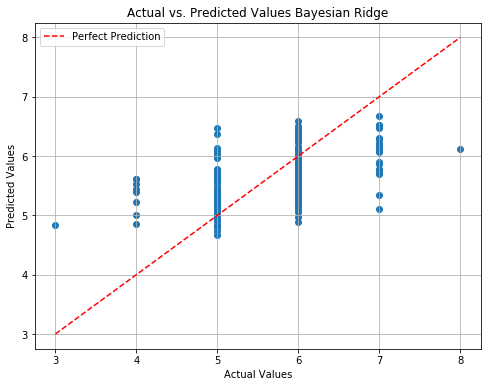

In [41]:
plt.figure(figsize=(8, 6))
models[1].fit(train_X,train_y)
prediction = models[1].predict(val_X)

plt.scatter(val_y, prediction)
plt.plot([min(val_y), max(val_y)], [min(val_y), max(val_y)], linestyle='--', color='red', label='Perfect Prediction')  # Line of perfect agreement
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values Bayesian Ridge")
plt.legend()
plt.grid(True)
plt.show()

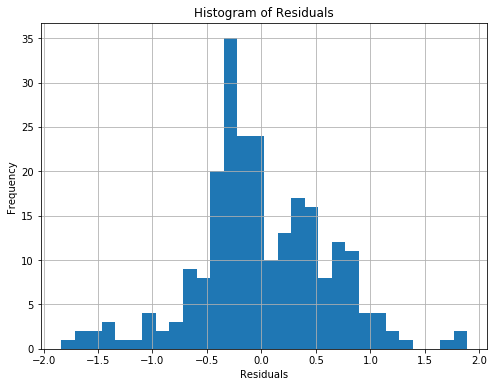

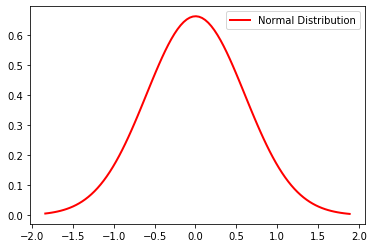

In [42]:
residuals = val_y - prediction
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30)  # Adjust number of bins as needed
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.grid(True)
plt.show()

#optional: add a normal distribution overlay for better assessment of normality
mu, std = np.mean(residuals), np.std(residuals)
x = np.linspace(min(residuals), max(residuals), 100)
plt.plot(x, (1/(std * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mu)/std)**2)),
         'r-', linewidth=2, label = 'Normal Distribution')
plt.legend()
plt.show()